災害の歴史

In [3]:
import pandas as pd
import matplotlib.pyplot as plt



In [4]:
# Explore the data
emdat.head()  # Display the first few rows

,Disaster Subgroup,Disaster Type,Disaster Subtype,ISO,Country,Subregion,Region,Latitude,Longitude,Start Year,Total Deaths
0,Meteorological,Storm,Tropical cyclone,USA,United States of America,Northern America,Americas,NaN,NaN,1900,6000.0
1,Hydrological,Flood,Flood (General),JAM,Jamaica,Latin America and the Caribbean,Americas,NaN,NaN,1900,300.0
2,Biological,Epidemic,Viral disease,JAM,Jamaica,Latin America and the Caribbean,Americas,NaN,NaN,1900,30.0
3,Geophysical,Volcanic activity,Ash fall,JPN,Japan,Eastern Asia,Asia,NaN,NaN,1900,30.0
4,Geophysical,Earthquake,Ground movement,TUR,Türkiye,Western Asia,Asia,40.3,43.1,1900,140.0


災害別発見件数

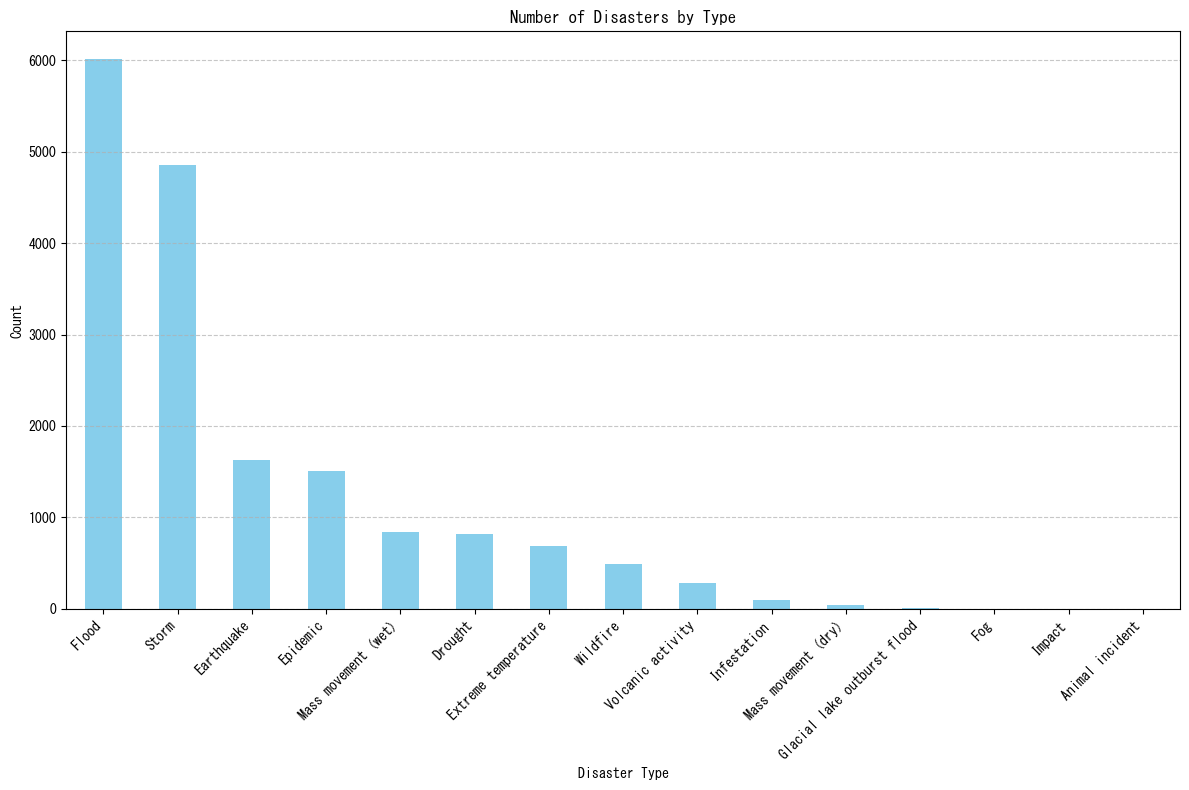

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# データを読み込む
df = pd.read_csv('emdat.csv')

# 災害種類別（Disaster Type）の件数を集計する
# ※翻訳辞書を使わず、元の英語データのまま集計します
disaster_counts = df['Disaster Type'].value_counts()

# グラフを作成
plt.figure(figsize=(12, 8))
disaster_counts.plot(kind='bar', color='skyblue')

# タイトルとラベルの設定
plt.title('Number of Disasters by Type')
plt.xlabel('Disaster Type')
plt.ylabel('Count')

# 項目名を斜めにする設定（rotation=45）
plt.xticks(rotation=45, ha='right')

# グラフを表示
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

グラフ全体を通して最も重要な点は、「洪水」と「嵐・暴風」の2項目だけで全体の過半数を大きく占めているという事実。
気象災害の頻度が圧倒的である 地震や火山活動といった地質学的な災害に比べ、気象現象に起因する災害（風水害）の方が発生頻度が桁違いに高いことがわかります。
発生件数という観点で見れば、洪水や暴風への防災・減災対策が最も日常的かつ頻繁に必要とされていることを示唆していた。
 風水害が中心であるものの、地震や伝染病も一定数発生しており、頻度は低くても多岐にわたる災害種別が存在するため、複合的なリスク管理が必要であることが読み取れます。

地域別災害件数

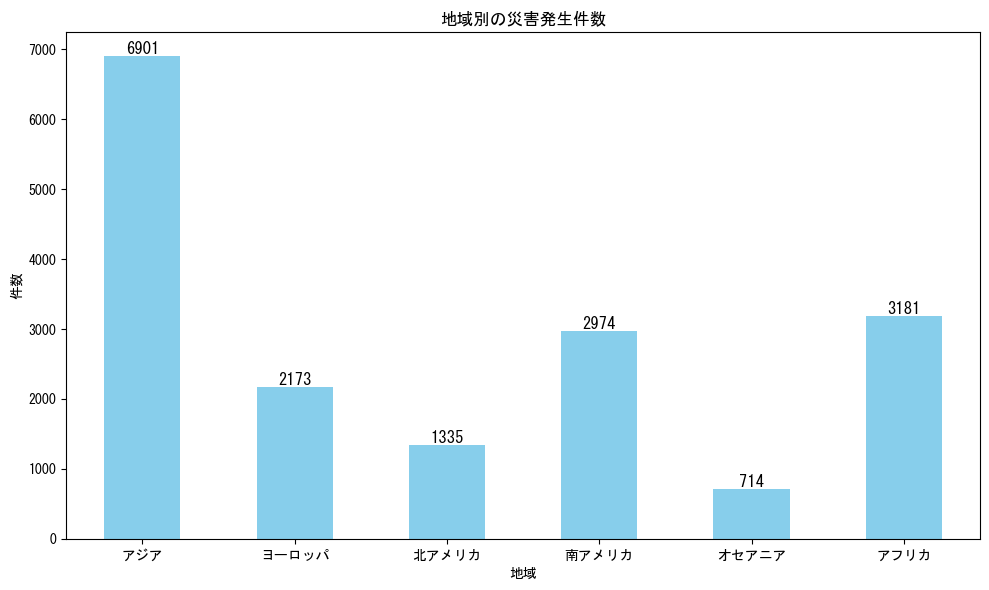

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# データを読み込む
df = pd.read_csv('emdat.csv')

# 地域を6つに分類する関数
def get_custom_region(row):
    subregion = row['Subregion']
    region = row['Region']
    
    if subregion == 'Northern America':
        return '北アメリカ'
    elif subregion == 'Latin America and the Caribbean':
        return '南アメリカ'
    elif region == 'Asia':
        return 'アジア'
    elif region == 'Europe':
        return 'ヨーロッパ'
    elif region == 'Africa':
        return 'アフリカ'
    elif region == 'Oceania':
        return 'オセアニア'
    else:
        return 'その他'

# 新しい地域列を作成
df['Custom Region'] = df.apply(get_custom_region, axis=1)

# 地域ごとの合計件数を集計
region_counts = df['Custom Region'].value_counts()

# 指定された順序で並べ替え
order = ['アジア', 'ヨーロッパ', '北アメリカ', '南アメリカ', 'オセアニア', 'アフリカ']
region_counts = region_counts.reindex(order)

# フォント設定 (Windows/Mac用)
plt.rcParams['font.family'] = 'MS Gothic' # Macなら 'Hiragino Sans'

# グラフ作成
plt.figure(figsize=(10, 6))
ax = region_counts.plot(kind='bar', color='skyblue')

plt.title('地域別の災害発生件数')
plt.xlabel('地域')
plt.ylabel('件数')
plt.xticks(rotation=0)

# 棒の上に数値を表示する処理
for p in ax.patches:
    ax.annotate(str(p.get_height()), 
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=12)

plt.tight_layout()
plt.show()

災害の発生分布には大きな地域差があり、特にアジア地域への集中が顕著です。「アジアでの発生が極端に多く、次いで南半球を含むアフリカ・南アメリカが多い」という傾向が見て取れました。

災害による死者数が多い国上位20カ国

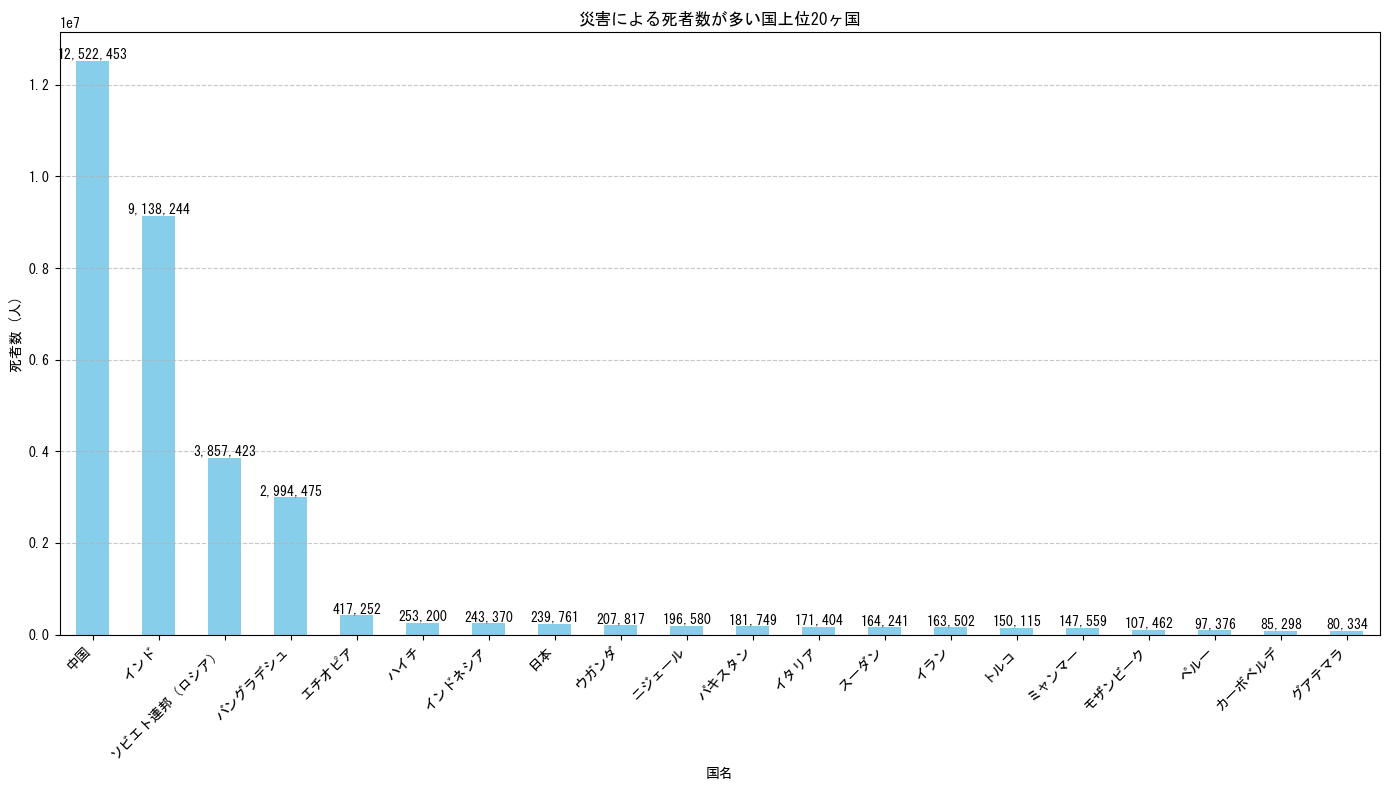

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# データを読み込む
df = pd.read_csv('emdat.csv')

# 死者数の集計
df['Total Deaths'] = df['Total Deaths'].fillna(0)
top20 = df.groupby('Country')['Total Deaths'].sum().sort_values(ascending=False).head(20)

# 国名の日本語変換辞書（修正版）
country_map = {
    'China': '中国',
    'India': 'インド',
    'Soviet Union': 'ソビエト連邦（ロシア）', # ここを変更しました
    'Bangladesh': 'バングラデシュ',
    'Ethiopia': 'エチオピア',
    'Haiti': 'ハイチ',
    'Indonesia': 'インドネシア',
    'Japan': '日本',
    'Uganda': 'ウガンダ',
    'Niger': 'ニジェール',
    'Pakistan': 'パキスタン',
    'Italy': 'イタリア',
    'Sudan': 'スーダン',
    'Iran (Islamic Republic of)': 'イラン',
    'Türkiye': 'トルコ',
    'Myanmar': 'ミャンマー',
    'Mozambique': 'モザンビーク',
    'Peru': 'ペルー',
    'Cabo Verde': 'カーボベルデ',
    'Guatemala': 'グアテマラ'
}

# インデックス（国名）を日本語に書き換え
top20_jp = top20.rename(index=country_map)

# フォント設定
plt.rcParams['font.family'] = 'MS Gothic' # Macなら 'Hiragino Sans'

# グラフ作成
plt.figure(figsize=(14, 8))
ax = top20_jp.plot(kind='bar', color='skyblue')

plt.title('災害による死者数が多い国上位20ヶ国')
plt.xlabel('国名')
plt.ylabel('死者数 (人)')

# 国名を斜め表示
plt.xticks(rotation=45, ha='right')

# 数値を棒の上に表示
for p in ax.patches:
    ax.annotate(f'{int(p.get_height()):,}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

この図から読めることは、災害による人的被害は世界全体に均等に分散しているのではなく、人口が密集し、かつ水害などの大規模災害が発生しやすいアジアの大国に極度に集中しているとされている。

In [21]:
pip install geopandas matplotlib

   ---------------------------------------- 0.0/19.2 MB ? eta -:--:--
   --- ------------------------------------ 1.6/19.2 MB 7.0 MB/s eta 0:00:03
   ------- -------------------------------- 3.7/19.2 MB 8.9 MB/s eta 0:00:02
   ------------- -------------------------- 6.6/19.2 MB 9.8 MB/s eta 0:00:02
   ------------------ --------------------- 8.9/19.2 MB 10.1 MB/s eta 0:00:02
   -------------------------- ------------- 12.8/19.2 MB 11.8 MB/s eta 0:00:01
   ---------------------------------- ----- 16.5/19.2 MB 12.7 MB/s eta 0:00:01
   ---------------------------------------- 19.2/19.2 MB 12.8 MB/s  0:00:01
   ---------------------------------------- 0.0/6.3 MB ? eta -:--:--
   -------------------------- ------------- 4.2/6.3 MB 21.4 MB/s eta 0:00:01
   ---------------------------------------- 6.3/6.3 MB 18.8 MB/s  0:00:00
   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   ---------------------------------------- 1.7/1.7 MB 18.3 MB/s  0:00:00

   --------------------

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [23]:
import pandas as pd
import folium
import requests

# 1. データの読み込み
df = pd.read_csv('emdat.csv')

# 国ごとの死者数を集計
country_data = df.groupby('ISO')['Total Deaths'].sum().reset_index()
country_data['Total Deaths'] = country_data['Total Deaths'].fillna(0)

# 2. 世界地図の枠線データ（GeoJSON）をウェブから取得
geo_url = "https://raw.githubusercontent.com/python-visualization/folium/master/examples/data/world-countries.json"
# ※このURLはfolium公式のサンプルデータです

# 3. 地図の作成
m = folium.Map(location=[20, 0], zoom_start=2)

# コロプレスマップ（塗り分け地図）のレイヤーを追加
folium.Choropleth(
    geo_data=geo_url,
    name="choropleth",
    data=country_data,
    columns=["ISO", "Total Deaths"],
    key_on="feature.id",  # GeoJSON内の国コード(ID)と紐付け
    fill_color="YlOrRd",  # 色（黄色〜赤）
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="Total Deaths by Disaster",
    nan_fill_color="white" # データがない国は白
).add_to(m)

# 4. 保存
m.save('map_folium_deaths.html')
print("map_folium_deaths.html を作成しました。ブラウザで開いて確認してください。")

map_folium_deaths.html を作成しました。ブラウザで開いて確認してください。


In [25]:
import pandas as pd
import folium
from folium.plugins import MarkerCluster

# 1. データの読み込み
df = pd.read_csv('emdat.csv')

# 2. 緯度経度があるデータのみ抽出
df_map = df.dropna(subset=['Latitude', 'Longitude'])

# 3. 地図の作成 (初期表示は世界全体)
m = folium.Map(location=[20, 0], zoom_start=2)

# マーカークラスター (点が重ならないようにまとめる機能)
marker_cluster = MarkerCluster().add_to(m)

# 4. マーカーを追加 (URLリンク付き)
for idx, row in df_map.iterrows():
    # 検索用のキーワード作成
    search_query = f"{row['Disaster Type']} {row['Country']} {row['Start Year']}"
    search_url = f"https://www.google.com/search?q={search_query}"
    
    # ポップアップの内容 (HTMLタグでリンクを作成)
    popup_text = f"""
    <div style="width:200px">
        <b>Country:</b> {row['Country']}<br>
        <b>Type:</b> {row['Disaster Type']}<br>
        <b>Year:</b> {row['Start Year']}<br>
        <b>Deaths:</b> {row['Total Deaths']}<br>
        <br>
        <a href="{search_url}" target="_blank" style="color:blue; text-decoration:underline;">
            Click to Search Info
        </a>
    </div>
    """
    
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=folium.Popup(popup_text, max_width=300),
        tooltip=f"{row['Disaster Type']} ({row['Country']})"
    ).add_to(marker_cluster)

# 5. 保存
output_file = 'map_with_url.html'
m.save(output_file)
print(f"'{output_file}' を作成しました。ブラウザで開いて確認してください。")

'map_with_url.html' を作成しました。ブラウザで開いて確認してください。


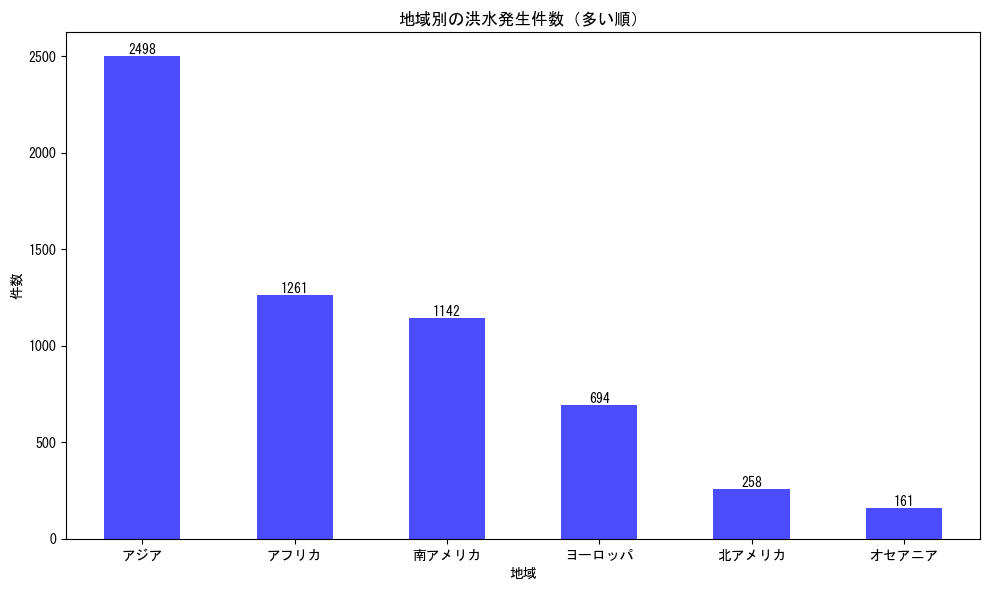

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

# データを読み込む
df = pd.read_csv('emdat.csv')

# 1. 洪水（Flood）のデータのみを抽出
df_flood = df[df['Disaster Type'] == 'Flood'].copy()

# 2. 地域を6つに分類する関数
def get_custom_region(row):
    subregion = row['Subregion']
    region = row['Region']
    
    if subregion == 'Northern America':
        return '北アメリカ'
    elif subregion == 'Latin America and the Caribbean':
        return '南アメリカ'
    elif region == 'Asia':
        return 'アジア'
    elif region == 'Europe':
        return 'ヨーロッパ'
    elif region == 'Africa':
        return 'アフリカ'
    elif region == 'Oceania':
        return 'オセアニア'
    else:
        return 'その他'

# 新しい地域列を作成
df_flood['Custom Region'] = df_flood.apply(get_custom_region, axis=1)

# 3. 地域ごとの件数を集計し、多い順に並べ替え
region_counts = df_flood['Custom Region'].value_counts().sort_values(ascending=False)

# フォント設定 (Windows/Mac用)
plt.rcParams['font.family'] = 'MS Gothic' # Macなら 'Hiragino Sans'

# 4. グラフ作成
plt.figure(figsize=(10, 6))
ax = region_counts.plot(kind='bar', color='blue', alpha=0.7)

plt.title('地域別の洪水発生件数（多い順）')
plt.xlabel('地域')
plt.ylabel('件数')
plt.xticks(rotation=0)

# 数値を表示
for p in ax.patches:
    ax.annotate(str(int(p.get_height())), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom')

plt.tight_layout()
plt.show()

地域別の洪水発生件数

この図から読めることは、アジアは人口が多いだけでなく、洪水を筆頭とした災害の発生件数も世界最多であるため、結果として人的被害（死者数）が桁違いに大きくなっていると考えられる。

洪水による死亡者数が多い国上位20カ国

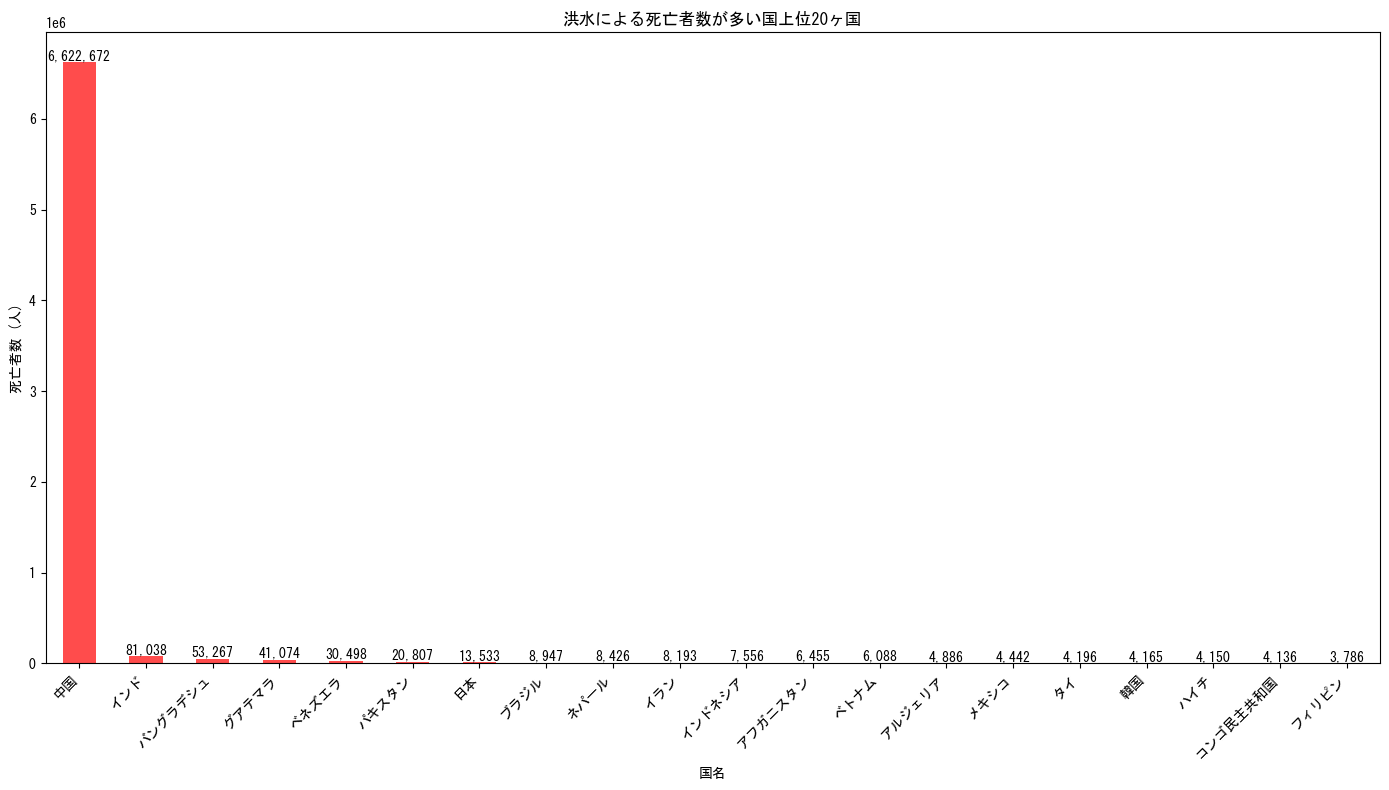

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# データを読み込む
df = pd.read_csv('emdat.csv')

# 1. 洪水データの抽出と欠損値処理
df_flood = df[df['Disaster Type'] == 'Flood'].copy()
df_flood['Total Deaths'] = df_flood['Total Deaths'].fillna(0)

# 2. 国ごとの死亡者数を集計し、上位20カ国を抽出
top20_flood_deaths = df_flood.groupby('Country')['Total Deaths'].sum().sort_values(ascending=False).head(20)

# 3. 日本語変換辞書（上位20カ国に合わせて修正）
country_map = {
    'China': '中国',
    'India': 'インド',
    'Bangladesh': 'バングラデシュ',
    'Guatemala': 'グアテマラ',
    'Venezuela (Bolivarian Republic of)': 'ベネズエラ',
    'Pakistan': 'パキスタン',
    'Japan': '日本',
    'Brazil': 'ブラジル',
    'Nepal': 'ネパール',
    'Iran (Islamic Republic of)': 'イラン',
    'Indonesia': 'インドネシア',
    'Afghanistan': 'アフガニスタン',
    'Viet Nam': 'ベトナム',
    'Algeria': 'アルジェリア',
    'Mexico': 'メキシコ',
    'Thailand': 'タイ',
    'Republic of Korea': '韓国',
    'Haiti': 'ハイチ',
    'Democratic Republic of the Congo': 'コンゴ民主共和国',
    'Philippines': 'フィリピン'
}

# 辞書を使って国名を日本語に変換
top20_flood_deaths_jp = top20_flood_deaths.rename(index=country_map)

# フォント設定 (Windows/Mac用)
plt.rcParams['font.family'] = 'MS Gothic' # Macなら 'Hiragino Sans'

# 4. グラフ作成
plt.figure(figsize=(14, 8))
ax = top20_flood_deaths_jp.plot(kind='bar', color='red', alpha=0.7)

plt.title('洪水による死亡者数が多い国上位20ヶ国')
plt.xlabel('国名')
plt.ylabel('死亡者数 (人)')

# 国名を斜め表示
plt.xticks(rotation=45, ha='right')

# 数値を表示（カンマ区切り）
for p in ax.patches:
    ax.annotate(f'{int(p.get_height()):,}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom')

plt.tight_layout()
plt.show()



発生件数： 世界的に見て、洪水はアジア地域で最も頻繁に発生している。

人的被害： 中国は、その頻発する洪水によって、世界で最も多くの人的被害（死者数）を出している国である。

災害の質の違い： 同じく災害死者数が多いインドと比較しても、中国は特に「洪水による死亡率」が極端に高いという特徴がある。

In [2]:
import pandas as pd
import folium
import numpy as np
from branca.element import Template, MacroElement

# 1. データ読み込みと前処理
df = pd.read_csv('emdat.csv')
df_flood = df[df['Disaster Type'] == 'Flood'].copy()

# 国ごとの集計（件数、死者数、位置）
country_stats = df_flood.groupby(['Country', 'ISO']).agg({
    'Disaster Type': 'count',
    'Total Deaths': 'sum',
    'Latitude': 'mean',
    'Longitude': 'mean'
}).reset_index()
country_stats.rename(columns={'Disaster Type': 'Event Count'}, inplace=True)
country_stats = country_stats.dropna(subset=['Latitude', 'Longitude'])

# 2. マップの作成（初期表示）
m = folium.Map(location=[20, 0], zoom_start=2)

# --- 改良点: タイトルの追加 (HTML) ---
title_html = '''
     <h3 align="center" style="font-size:20px"><b>世界の洪水発生状況マップ</b></h3>
     '''
m.get_root().html.add_child(folium.Element(title_html))

# --- 改良点: 色分け関数の定義 ---
def get_color(count):
    if count >= 100:
        return 'darkred'  # 非常に多い（100件以上）
    elif count >= 50:
        return 'red'      # 多い（50件以上）
    elif count >= 10:
        return 'orange'   # 中程度（10件以上）
    else:
        return 'green'    # 少ない（10件未満）

# 3. データをループして円を追加
for idx, row in country_stats.iterrows():
    count = row['Event Count']
    color = get_color(count)
    
    # 円の大きさ調整（見やすくするため）
    radius = np.sqrt(count) * 2 + 3
    
    # --- 改良点: 日本語ポップアップ ---
    popup_text = f"""
    <div style="font-family: sans-serif; width: 220px;">
        <h4 style="margin-bottom:5px;">{row['Country']}</h4>
        <hr style="margin:5px 0;">
        <b>発生件数:</b> {count} 回<br>
        <b>総死者数:</b> {int(row['Total Deaths']):,} 人<br>
        <br>
        <span style="color:gray; font-size:0.9em;">円の色: {color} (件数レベル)</span>
    </div>
    """
    
    folium.CircleMarker(
        location=[row['Latitude'], row['Longitude']],
        radius=radius,
        popup=folium.Popup(popup_text, max_width=260),
        color=color,
        fill=True,
        fill_color=color,
        fill_opacity=0.6,
        tooltip=f"{row['Country']}: {count}件"
    ).add_to(m)

# --- 改良点: 凡例（レジェンド）の追加 ---
# HTMLとCSSで地図上にフロート表示させる
legend_html = '''
<div style="position: fixed; 
     bottom: 50px; right: 50px; width: 150px; height: 130px; 
     border:2px solid grey; z-index:9999; font-size:14px;
     background-color:white; opacity:0.8; padding: 10px;">
     <b>凡例 (発生件数)</b><br>
     <i style="background:darkred; width:10px; height:10px; float:left; margin-right:5px; border-radius:50%;"></i> 100件以上<br>
     <i style="background:red; width:10px; height:10px; float:left; margin-right:5px; border-radius:50%;"></i> 50件以上<br>
     <i style="background:orange; width:10px; height:10px; float:left; margin-right:5px; border-radius:50%;"></i> 10件以上<br>
     <i style="background:green; width:10px; height:10px; float:left; margin-right:5px; border-radius:50%;"></i> 10件未満
</div>
'''
m.get_root().html.add_child(folium.Element(legend_html))

# 4. 保存
output_file = 'flood_map_improved.html'
m.save(output_file)
print(f"'{output_file}' を作成しました。ブラウザで開くと、日本語解説付きの地図が表示されます。")

'flood_map_improved.html' を作成しました。ブラウザで開くと、日本語解説付きの地図が表示されます。


Pythonとデータ分析ライブラリを使用し、国際災害データベースのCSVデータを分析しました。
　学んだことは、地域別に見ると、アジアでの洪水発生件数が約2,500件と世界で突出して多く、次いでアフリカ、南アメリカと続いています。アジアは地形や気候の影響を受けやすく、災害リスクが高い地域であることがデータから読み取れました。
　プログラミングの有用性 数万件以上ある膨大な災害データを、Pythonを使うことで瞬時に集計・並べ替えができたことに感動しました。手作業では不可能な分析も、プログラミングを活用すれば効率的に行えることを実感しました。
